### train_test_split   : train / test        ,  hold out 분리          ## 아래 예시

### StratifiedKFold   : 층화추출법으로 집단별 K-Fold 진행   ## 아래 예시

### cross_val_score :(층화추출법 적용) 원큐에 kfold + 점수까지 한번에 계산

### cross_val_predict:  CV로 예측한 결과값을 합친 리스트를 출력

### GridSearchCV     :(층화추출법 적용) 최적화된 머신러닝 파라미터를 찾아줌 ## 아래 예시


In [154]:
## 종합 요약 note 

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

iris = load_iris()
dt_clf = DecisionTreeClassifier() ### 0. 모델 객체 생성

train_data = iris.data       ### 1. train / test 데이터 셋 분리 
label_data = iris.target    ### 1. train / test 데이터 셋 분리 

data = pd.DataFrame(data = train_data, columns=iris.feature_names)
data['label'] = label_data



## 테스트용 데이터가 없기때문에, 테스트용 데이터를 나눔 
train, test =  train_test_split(data, test_size = 0.2 ) 
# x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=121)

list_col = list(train.columns)
list_col.remove('label')

x= train[list_col]  ## train 데이터에서 X값
y= train['label']   ## train 데이터에서 Y값




### 아래 CV + 최적 파라미터 찾기 방법은 상황에 따라  케이스 별로 선택한다. ###

## Cross Validation으로 적합 모델 찾기 (1)  : StratifiedKFold
kfold = StratifiedKFold(n_splits= 5)
score_list = []
for train_index, test_index in kfold.split(train, train['label']):
    
    x_train = x.iloc[train_index]
    x_test = x.iloc[test_index]
    
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    dt_clf.fit(x_train, y_train)
    
    prediction = dt_clf.predict(x_test)
    score = accuracy_score(prediction, y_test)
    score_list.append(score)
print('### cross_val_score 방법 결과: ', score_list, np.mean(score_list), '\n\n')


## Cross Validation으로 적합 모델 찾기 (2)   :  cross_val_score
score2  = cross_val_score(estimator=dt_clf, X = x, y = y, scoring='accuracy',cv=3 )
print('### cross_val_score 방법 결과: ' ,score2, np.mean(score2)  , '\n\n')


## Cross Validation으로 적합 모델 찾기 (3) + 모델의 최적 파라미터 찾기  :  GridSearchCV
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}  

grid_dtree = GridSearchCV(dt_clf, param_grid= parameters, cv =5 , refit = True)
grid_dtree.fit(x, y)
best_estimator = grid_dtree.best_estimator_   
print('### GridSearchCV 관련 요소 :' ,grid_dtree.best_score_, grid_dtree.best_params_, grid_dtree.cv_results_, sep = '\n', end = '\n\n')





## test 데이터로 평가하기

test_x= test[list_col]  ## train 데이터에서 X값
test_y= test['label'] 

prediction = best_estimator.predict(test_x)
final_score = accuracy_score(prediction, test_y)
print('### 최종 test score :', final_score)


### cross_val_score 방법 결과:  [1.0, 0.9166666666666666, 0.9583333333333334, 0.9583333333333334, 1.0] 0.9666666666666668 


### cross_val_score 방법 결과:  [0.95 0.95 0.9 ] 0.9333333333333332 


### GridSearchCV 관련 요소 :
0.975
{'max_depth': 3, 'min_samples_split': 3}
{'mean_fit_time': array([0.00120053, 0.00080009, 0.00080028, 0.00119972, 0.00100012,
       0.00100002]), 'std_fit_time': array([4.00495714e-04, 4.00042601e-04, 4.00137969e-04, 4.00185709e-04,
       3.16297988e-07, 3.56832255e-07]), 'mean_score_time': array([0.00040011, 0.00039988, 0.00040007, 0.00020032, 0.00020003,
       0.00040007]), 'std_score_time': array([0.00049004, 0.00048975, 0.00048998, 0.00040064, 0.00040007,
       0.00048998]), 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
             mask=[False, False, False, False, False, False

## Model Selection 모듈

*   모델 구성 및학습에 필요한 다양한 API 제공
*   데이터 세트 분리
*   교차 검증 분할 및 평가
*   하이퍼 파라미터튜닝

# 데이터 셋 분할의 필요성
* 학습 데이터셋으로 평가 수행시 부정확한(과도하게 높은) 평가 결과 발생


In [ ]:
# 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
## 머신 러닝 초간단 4단계 (살펴보기) ###
iris = load_iris()
dt_clf = DecisionTreeClassifier() ### 0. 모델 객체 생성

train_data = iris.data       ### 1. train / test 데이터 셋 분리 
train_label = iris.target    ### 1. train / test 데이터 셋 분리 

dt_clf.fit(train_data, train_label)  ### 2. 모델 학습(fit) 하기
pred = dt_clf.predict(train_data)   ### 3. 학습된 모델로 예측하기(predict)

print('prediction accuracy:', accuracy_score(train_label, pred))

prediction accuracy: 1.0


# train_test_split() API - 데이터 셋의 분할(학습/ 테스트)을 쉽게 할 수 있는 API

* Argument(인자)

> • test_size: 테스트 데이터셋의 비율

> • train_size: 학습 데이터셋의 비율

> • shuffle: 데이터셋 분리 전 미리 섞을지 여부

> • random_state: 실행시 마다 동일한 난수를 생성하기 위한 값

* Return

> • 튜플 형태로 분할(학습/ 테스트)된 데이터 리턴



train_test_split 은 데이터 분포상태를 반영하여, 나눈다. 
(그래도 불균형 데이터가 있을경우, train_test_split 실행 전후로 분포 비율 반영되었는지 확인 필요

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=121)

## train과 test의 비율을 7:3의 비율로 나눈다. 
## shuffle은 False로 한 상태 (섞지 않음)

print(len(iris.data), len(iris.target))   
print(len(x_train), len(x_test), len(y_train), len(y_test))
print(x_train, x_test, y_train, y_test, sep = '\n\n\n')



150 150
105 45 105 45
[[6.3 2.8 5.1 1.5]
 [6.8 3.2 5.9 2.3]
 [4.8 3.4 1.9 0.2]
 [6.3 2.5 4.9 1.5]
 [5.  3.5 1.3 0.3]
 [5.2 3.5 1.5 0.2]
 [4.4 3.  1.3 0.2]
 [5.7 4.4 1.5 0.4]
 [6.1 3.  4.6 1.4]
 [6.7 3.  5.  1.7]
 [5.  3.4 1.6 0.4]
 [6.5 3.  5.2 2. ]
 [6.7 3.3 5.7 2.5]
 [5.  2.3 3.3 1. ]
 [5.4 3.4 1.5 0.4]
 [4.4 3.2 1.3 0.2]
 [6.2 2.9 4.3 1.3]
 [5.1 3.5 1.4 0.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [4.6 3.6 1.  0.2]
 [4.8 3.4 1.6 0.2]
 [7.3 2.9 6.3 1.8]
 [6.7 3.3 5.7 2.1]
 [6.1 2.8 4.7 1.2]
 [5.8 2.8 5.1 2.4]
 [5.9 3.  5.1 1.8]
 [6.3 3.3 4.7 1.6]
 [5.4 3.  4.5 1.5]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [6.4 2.8 5.6 2.1]
 [5.6 2.5 3.9 1.1]
 [5.1 3.8 1.9 0.4]
 [6.2 2.8 4.8 1.8]
 [4.7 3.2 1.3 0.2]
 [5.5 2.4 3.8 1.1]
 [5.9 3.  4.2 1.5]
 [7.2 3.2 6.  1.8]
 [5.5 2.4 3.7 1. ]
 [4.9 3.6 1.4 0.1]
 [5.7 2.8 4.1 1.3]
 [5.8 2.7 5.1 1.9]
 [6.7 3.  5.2 2.3]
 [5.7 2.5 5.  2. ]
 [4.9 3.1 1.5 0.1]
 [6.3 3.3 6.  2.5]
 [5.5 4.2 1.4 0.2]
 [6.7 3.1 5.6 2.4]
 [7.7 3.  6.1 2.3]
 [5.  3.2 1.2 0.2]
 [5.1 3.5

In [14]:
### shuffle을 하게 되었을때의 모습  : 데이터가 뒤섞여 있다.
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=121
                                                ,shuffle = True)
print(x_train, x_test, y_train, y_test, sep = '\n\n\n')



[[6.3 2.8 5.1 1.5]
 [6.8 3.2 5.9 2.3]
 [4.8 3.4 1.9 0.2]
 [6.3 2.5 4.9 1.5]
 [5.  3.5 1.3 0.3]
 [5.2 3.5 1.5 0.2]
 [4.4 3.  1.3 0.2]
 [5.7 4.4 1.5 0.4]
 [6.1 3.  4.6 1.4]
 [6.7 3.  5.  1.7]
 [5.  3.4 1.6 0.4]
 [6.5 3.  5.2 2. ]
 [6.7 3.3 5.7 2.5]
 [5.  2.3 3.3 1. ]
 [5.4 3.4 1.5 0.4]
 [4.4 3.2 1.3 0.2]
 [6.2 2.9 4.3 1.3]
 [5.1 3.5 1.4 0.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [4.6 3.6 1.  0.2]
 [4.8 3.4 1.6 0.2]
 [7.3 2.9 6.3 1.8]
 [6.7 3.3 5.7 2.1]
 [6.1 2.8 4.7 1.2]
 [5.8 2.8 5.1 2.4]
 [5.9 3.  5.1 1.8]
 [6.3 3.3 4.7 1.6]
 [5.4 3.  4.5 1.5]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [6.4 2.8 5.6 2.1]
 [5.6 2.5 3.9 1.1]
 [5.1 3.8 1.9 0.4]
 [6.2 2.8 4.8 1.8]
 [4.7 3.2 1.3 0.2]
 [5.5 2.4 3.8 1.1]
 [5.9 3.  4.2 1.5]
 [7.2 3.2 6.  1.8]
 [5.5 2.4 3.7 1. ]
 [4.9 3.6 1.4 0.1]
 [5.7 2.8 4.1 1.3]
 [5.8 2.7 5.1 1.9]
 [6.7 3.  5.2 2.3]
 [5.7 2.5 5.  2. ]
 [4.9 3.1 1.5 0.1]
 [6.3 3.3 6.  2.5]
 [5.5 4.2 1.4 0.2]
 [6.7 3.1 5.6 2.4]
 [7.7 3.  6.1 2.3]
 [5.  3.2 1.2 0.2]
 [5.1 3.5 1.4 0.2]
 [5.6 2.8 4.

* 분할된 데이터 중 학습데이터를 이용해 학습
* 분할된 데이터 중 테스트 데이터를 이용해 성능 검증


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Decision Tree 모델 객체 생성
dt_clf = DecisionTreeClassifier()

In [ ]:
# Decision Tree 모델 객체 학습
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 테스트 데이터를 이용한 예측
pred = dt_clf.predict(x_test)

print('prediction accuracy : {}'.format(accuracy_score(y_test, pred)))

prediction accuracy : 0.9555555555555556


# K Fold Cross Validation(K겹교차검증)

• 가장보편적으로 사용되는 교차검증방법
• K 개의데이터 Fold를만들어 학습과 검증평가를 반복수행


# KFold API - K겹 교차 검증을 쉽게 적용 할 수 있는 Cross Validation API



• 데이터 Fold들의평가지표를평균낸값이 K Fold 평가지표

• 사이킷런에서 제공되는 API

>• KFold

>• StratifiedKFold

• Argument(인자, 두 API 동일)
> • n_splits: 생성하고자 하는 데이터 Fold의 개수

>   • shuffle: 데이터 Fold 분리 전 미리 섞을지 여부
     
>  • random_state: 실행시마다 동일한 난수를 생성하기 위한 값


In [15]:
# Iris 데이터셋 로드 및 KFold 객체 생성

from sklearn.model_selection import KFold      ## KFold 활용
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data
label = iris.target

kfold = KFold(n_splits=5)    ## KFold 객체 생성 , 5조각

print('iris Data set Size :', features.shape[0])


iris Data set Size : 150


In [32]:
## KFold 객체 탐구

print(kfold )
print(kfold.split(features))  

for train_index, test_index in kfold.split(features):   ##  KFold 객체를 반복문에서 활용 (iteratable)
    print(train_index, test_index, sep= '\n', end = '\n\n')
    
else:
    print(features[train_index], len(features[train_index]))  ## 출력된 index를 활용하는 방법

KFold(n_splits=5, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x00000259CDF2CAC8>
[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105

In [16]:
# Decision Tree 객체 생성 및 Fold 별 지표 값 저장을 위한 리스트 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score       ## 평가 지표는 accuracy_score
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=156)  ## 모델 객체 생성
cv_accuracy = []           ## 

In [36]:
fold_index = 0

for train_index, test_index in kfold.split(features):
    # KFold 객체의 split() 함수를 이용해 분할된 Fold 별 인덱스 생성
    # 생성된 인덱스를 이용해 데이터셋 분할
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
#     print(train_index)
#     print(test_index)

    # 분할된 Fold를 이용하여 모델 학습 
    dt_clf.fit(x_train, y_train)

    # 성능 측정
    pred = dt_clf.predict(x_test)

    fold_index += 1

    # Fold 별 정확도 지표 측정 및 cv_accuracy 리스트에 추가
    accuracy = np.round(accuracy_score(y_test, pred), 4)  ## accuracy_score를 활용한 평가
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    print("\n #{0} fold accuracy : {1}, train size : {2}, val size : {3}".format(
        fold_index, accuracy, train_size, test_size))
    

    cv_accuracy.append(accuracy)

    # cv_accuracy 리스트에 저장된 Fold 별 정확도 값을 이용해 평균 정확도 계산
    # 계산된 KFold 평가지표(평균 정확도) 출력

print('\n ## avg val accuracy :', np.mean(cv_accuracy)) ## 전페 평가지표에 대한 평균 산출



 #1 fold accuracy : 1.0, train size : 120, val size : 30

 #2 fold accuracy : 0.9667, train size : 120, val size : 30

 #3 fold accuracy : 0.8667, train size : 120, val size : 30

 #4 fold accuracy : 0.9333, train size : 120, val size : 30

 #5 fold accuracy : 0.7333, train size : 120, val size : 30

 ## avg val accuracy : 0.9


# Stratified K Fold 
* Imbalanced(불균형) 분포를  가진 데이터  셋을 위한  방식
*  랜덤  샘플링을 하는 KFold의 경우 Imbalanced 데이터 셋의 비율을 반영하지 못함
* Stratified KFold 의 경우 데이터 셋의 비율을 반영하여 샘플링 수행

### KFold API를 이용하여 Fold 생성 시 데이터의 분포 확인

### <집단별로 (층화) 고르게 추출함>
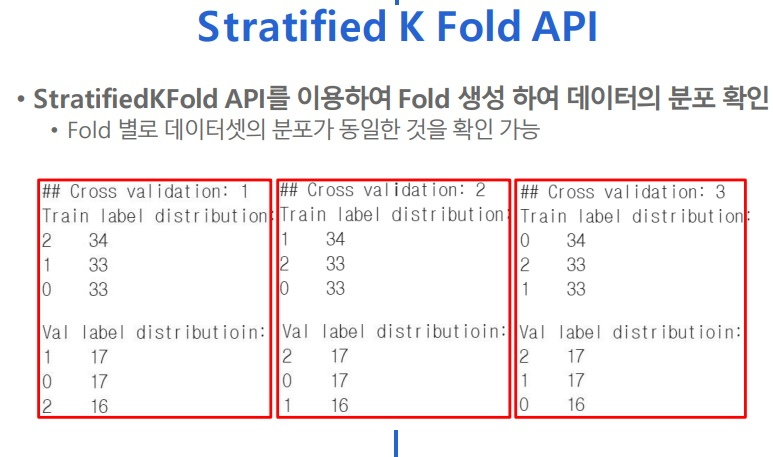




### StratifiedKFold API를 이용하여 Fold 생성 하여 데이터의 분포 확인

In [55]:
# Iris 데이터셋 로드하여 DataFrame 객체 생성

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
df_iris['label']=iris.target
df_iris['label'].value_counts()

print(df_iris, df_iris['label'].value_counts(), sep = '\n\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

In [53]:
# n_splits 인자를 3으로 지정하여 StartifiedKFold 객체 생성

from sklearn.model_selection import StratifiedKFold   ## StratifiedKFold 활용

skf = StratifiedKFold(n_splits=3) 
fold_index = 0

In [60]:
# StartifiedKFold 객체의 split() 메소드에  분포 확인을 위한 label 데이터셋을 인자로 전달
# StartifiedKFold API로 생성한 인덱스로 데이터셋 분할

for train_index, test_index in skf.split(df_iris, df_iris['label']): ## 층화추출을 위해 집단별 리스트를(df_iris['label’]) 전달
    fold_index += 1
#     label_train = df_iris['label'].iloc[train_index]  ## 분포 확인용으로 label로 저장
#     label_test = df_iris['label'].iloc[test_index]    ## 분포 확인용으로 label로 저장
    
    data_train = df_iris.iloc[train_index]   ## 층화추출된 index 별로 데이터 프레임 출력 (혹은 필요시 대입)
    data_test =  df_iris.iloc[test_index]    ## 층화추출된 index 별로 데이터 프레임 출력 (혹은 필요시 대입)
    
  # DataFrame 객체의 value_counts() 메서드를 이용해 데이터 분포 확인
    print('## Cross validation: {0}'.format(fold_index)) 
    print('Train label distribution:') 
    print(data_train['label'].value_counts(), end='\n\n') 
    print('Val label distributioin:') 
    print(data_test['label'].value_counts(), end='\n\n')

## Cross validation: 8
Train label distribution:
2    34
1    33
0    33
Name: label, dtype: int64

Val label distributioin:
1    17
0    17
2    16
Name: label, dtype: int64

## Cross validation: 9
Train label distribution:
1    34
2    33
0    33
Name: label, dtype: int64

Val label distributioin:
2    17
0    17
1    16
Name: label, dtype: int64

## Cross validation: 10
Train label distribution:
0    34
2    33
1    33
Name: label, dtype: int64

Val label distributioin:
2    17
1    17
0    16
Name: label, dtype: int64



## StratifiedKFold API를 이용한 Cross Validation  (실제 활용)

In [58]:
# Iris 데이터셋 load
# DecisionTreeClassifier 모델 객체 생성

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

iris = load_iris()   
features = iris.data 
label = iris.target

dt_clf = DecisionTreeClassifier(random_state=156) 

skfold = StratifiedKFold(n_splits=5)     ##  5 fold로 StratifiedKFold 객체 생성


In [63]:
## StratifiedKFold를 활용한 accuracy 측정


    # Fold 별 지표 값 저장을 위한 lst_accuracy 리스트 생성
fold_index=0
lst_accuracy=[]

for train_index, test_index in skfold.split(features, label):   ## features를 label 별로 층화추출함.
    
    # StartifiedKFold API로 생성한 인덱스로 데이터셋 분할
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 분할된 데이터 Fold로 학습 및 예측 수행
    dt_clf.fit(x_train , y_train)
    pred = dt_clf.predict(x_test)
     
    # Fold 별 정확도 지표 측정 및 lst_accuracy 리스트에 추가
    fold_index += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)   ## np.round 는 반올림함수
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print('\n#{0} Cross val accuracy :{1}, train size: {2}, test size: {3}'.format(fold_index, accuracy, train_size, test_size)) 
    print('#{0} Val index:{1}'.format(fold_index,test_index))
    lst_accuracy.append(accuracy)
    
    
# lst_accuracy 리스트에 저장된 Fold 별 정확도  값을 이용해 평균 정확도 계산
print('\n## fold val accuracy:', np.round(lst_accuracy, 4)) 

# 계산된 KFold 평가 지표(평균 정확도) 출력
print('## avg val accuracy:', np.mean(lst_accuracy))
 




#1 Cross val accuracy :0.9667, train size: 120, test size: 30
#1 Val index:[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]

#2 Cross val accuracy :0.9667, train size: 120, test size: 30
#2 Val index:[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]

#3 Cross val accuracy :0.9, train size: 120, test size: 30
#3 Val index:[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]

#4 Cross val accuracy :0.9667, train size: 120, test size: 30
#4 Val index:[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]

#5 Cross val accuracy :1.0, train size: 120, test size: 30
#5 Val index:[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]

## fold va

## cross_val_score() API    
(위에서의 모든 과정을 함수로 한번에 해결, 층화추출 적용됨)

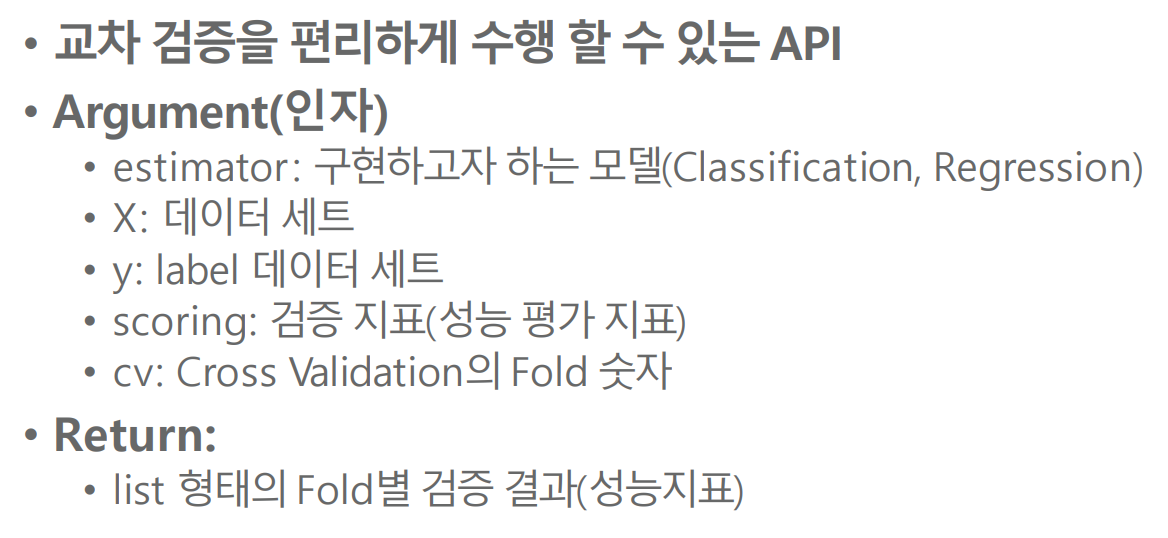

## cross_val_score() API를 이용하여 교차검증 성능 지표 계산

In [66]:
# Iris 데이터셋 load
# DecisionTreeClassifier 모델 객체 생성
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris

iris = load_iris() 
data = iris.data
label = iris.target

dt_clf = DecisionTreeClassifier(random_state=156)

In [67]:
# cross_val_score() API를 이용하여 교차검증 성능 지표를 list 형태로 생성
# score 리스트에 저장된 Fold 별 정확도 값을 이용해 평균 정확도 계산
# 계산된 KFold 평가지표(평균 정확도) 출력

from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(estimator=dt_clf, X=data, y=label,scoring='accuracy',cv=3)  # X는만 대문자 ㅋㅋ

print('Fold val accuracy:',np.round(scores, 4)) 
print('Avg val accuracy:', np.round(np.mean(scores), 4))




Fold val accuracy: [0.98 0.94 0.98]
Avg val accuracy: 0.9667


# cross_val_predict (cross_val_score() 과의 차이점???)

In [71]:
# Iris 데이터셋 load
# DecisionTreeClassifier 모델 객체 생성
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris

iris = load_iris() 
data = iris.data
label = iris.target

dt_clf = DecisionTreeClassifier(random_state=156)

In [92]:
##  cross_val_predict 활용  : train 데이터에 대해서 cv 자동적용하여 예측하는 함수 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=121)


## train 데이터에 대해서 cv 자동적용하여 예측하는 함수 
cv_predict = cross_val_predict(dt_clf, x_train, y_train, cv=5)  ## 
## cv 0 case에서의 pred 값(예측값)과 cv 1 case에서의 pred 값 이런식 으로 cv 4 case 에서의 pred값까지 
## 모든 pred 값(예측값)을 합친 리스트

score = accuracy_score(y_train, cv_predict)

print(cv_predict, score, sep='\n')



[1 2 0 1 0 0 0 0 1 2 0 2 2 1 0 0 1 0 2 2 0 0 2 2 1 2 2 1 1 2 1 2 1 0 2 0 1
 1 2 1 0 1 2 2 2 0 2 0 2 2 0 0 2 0 1 2 2 0 2 0 1 0 2 0 2 1 0 2 0 0 2 0 1 2
 1 1 0 1 1 2 0 2 1 2 1 2 1 0 2 0 0 1 1 1 0 1 1 0 0 1 2 1 1 0 1]
0.9619047619047619


# 무슨 말인지 모르겠습니다............ 
# 왜 pred + score와 cross_val_score가 다른가요?

 cross_val_predict 함수의 결과를 사용하여 모델의 성능(예를 들어 정확도)을 계산하면 cross_val_score 함수의 결과와 다르며 바람직한 일반화 성능 추정이 아닙니다. cross_val_predict 함수는 훈련 데이터셋에 대한 예측 결과를 시각화하거나 7장에서 소개하는 스태킹(Stacking) 앙상블(Ensemble) 방법처럼 다른 모델에 주입할 훈련 데이터를 만들기 위해 사용할 수 있습니다.

https://thebook.io/080223/ch06/02/02-04/

# GridSearchCV API (층화추출(Stratified) 적용됨)

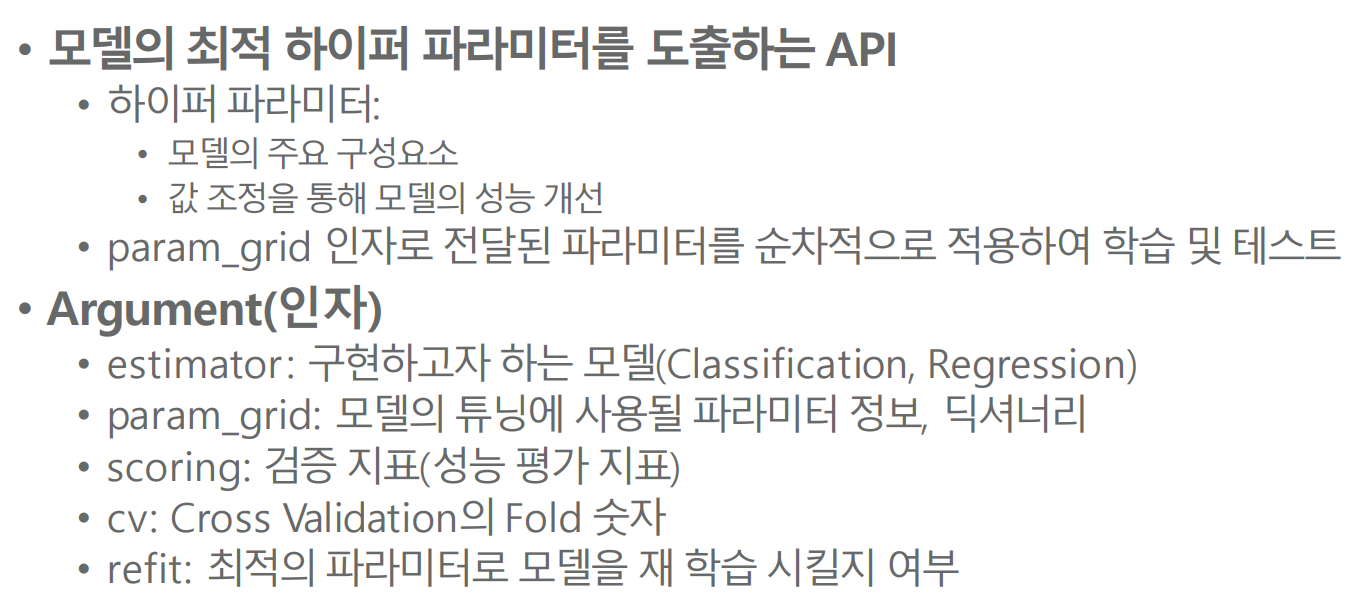

## GridSearchCV API를 이용하여 최적의 모델 학습 시키기

In [ ]:
# Iris 데이터 셋 load
# 학습/ 테스트 데이터 셋으로 분할
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

In [81]:
# GridSearchCV API 사용한 하이퍼파라미터 조정
# 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것!

# 검증을 진행할 모델의 파라미터 정보 지정
# 모델 객체와 파라미터 정보를 인자로 전달하여 GridSearchCV 객체 생성
# GridSearchCV 객체의 fit() 메서드를 이용해 학습 및 검증 진행

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]} ## 파라미터를 사용자가 설정해줘야함, 자동아님

grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 5, refit = True)
## scoring 인자 default = accuracy 적용됨
# scoring ="roc_auc" , scoring = "average_precision" 등 가능

grid_dtree.fit(x_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},

In [82]:
## cv_results_ Attributes   : 결과 출력

grid_dtree.cv_results_


## 'split2_test_score' : cv 별로 나누어진 스코어  (5조각이므로 split0 ~ split4까지 존재)

{'mean_fit_time': array([0.        , 0.00039868, 0.00067   , 0.00019989, 0.00020018,
        0.00039988]),
 'std_fit_time': array([0.        , 0.00048829, 0.00056154, 0.00039978, 0.00040035,
        0.00048975]),
 'mean_score_time': array([0.00040011, 0.        , 0.        , 0.00020013, 0.        ,
        0.        ]),
 'std_score_time': array([0.00049004, 0.        , 0.        , 0.00040026, 0.        ,
        0.        ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_sample

In [86]:
# best_estimator_  Attributes
grid_dtree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# GridSearchCV에서 scoring 조정하기 (RMSE로)
# LG 안테나 성능 예측_데이콘 데이터 예시

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_predict



x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=121)

model1 = RandomForestRegressor(random_state = 121)

parameters = {'max_depth' : [4,6,8,10], 'min_samples_split' : [2,4,6,8]}  

grid_RF = GridSearchCV(model1, param_grid= parameters, cv = 5 , refit = True)
grid_RF.fit(x_train, y_train)
best_estimator = grid_RF.best_estimator_   
print('### GridSearchCV 관련 요소 :' ,grid_RF.best_score_, grid_RF.best_params_, grid_RF.cv_results_, sep = '\n', end = '\n\n')

In [ ]:
# GridSearchCV에서 scoring 조정하기 (RMSE로)
# LG 안테나 성능 예측_데이콘 데이터 예시

# https://sophiesien.tistory.com/entry/sklearn-GridsearchCV-scoring-key
# https://www.inflearn.com/questions/35479

from sklearn.metrics import SCORERS

print(SCORERS.keys())   ## 스코어링의 종류 확인

# 출력 : 
# dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', '
# neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 
# 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 
# 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo',
# 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss',
# 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score',
# 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 
# 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 
# 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 
# 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro',
# 'jaccard_samples', 'jaccard_weighted'])

x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=121)

model1 = RandomForestRegressor(random_state = 121)

parameters = {'max_depth' : [9,10,11], 'min_samples_split' : [4,5]}  

grid_RF = GridSearchCV(model1, param_grid= parameters, cv = 5 , refit = True, scoring = 'neg_root_mean_squared_error')
grid_RF.fit(x_train, y_train)
best_estimator = grid_RF.best_estimator_   
print('### GridSearchCV 관련 요소 :' ,grid_RF.best_score_, grid_RF.best_params_, grid_RF.cv_results_, sep = '\n', end = '\n\n')




In [ ]:
grid_RF.scoring ## 적용된 scoring 확인, 출력 : neg_root_mean_squared_error

In [ ]:
## sklearn에서 custom metric으로 모델 선정하기
# LG 안테나 성능 예측_데이콘 데이터 예시

# https://frhyme.github.io/sklearn_make_scorer/
# https://dacon.io/competitions/official/235927/overview/rules

from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_predict

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여

    all_nrmse = []
    for idx in range(0,14): # ignore 'ID'
        rmse = mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score
  

# x_temp = x_train.iloc[:100]
# y_temp = y_train.iloc[:100]  

model2 = RandomForestRegressor(random_state = 121)

parameters = {'max_depth' : [5,7,9,11], 'min_samples_split' : [3,5,7]} 
# parameters = {'max_depth' : [9], 'min_samples_split' : [5]} 

grid_RF = GridSearchCV(model2, param_grid= parameters, cv = 5 , refit = True, scoring = make_scorer(lg_nrmse,  greater_is_better=False))
grid_RF.fit(x_train.to_numpy(), y_train.to_numpy())  ## 커스텀 사용자 함수 사용을 위해서는 numpy array로 입력해줘야함
best_estimator = grid_RF.best_estimator_   
print('### GridSearchCV 관련 요소 :' ,grid_RF.best_score_, grid_RF.best_params_, grid_RF.cv_results_, sep = '\n', end = '\n\n')
  

In [ ]:
pred = best_estimator.predict(x_test)

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(0,14): # ignore 'ID'
        rmse = mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

lg_nrmse(y_test.to_numpy(), pred)

# Attributes  종류

@ cv_results_
@ best_estimator_
@ best_score_
@ best_params_
@ 기타 등등

##### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [84]:
# GridSearchCV 객체를 이용한 학습 및 검증 결과 확인

import pandas as pd

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.666667,5,0.666667,0.666667,0.666667,0.666667,0.666667
1,"{'max_depth': 1, 'min_samples_split': 3}",0.666667,5,0.666667,0.666667,0.666667,0.666667,0.666667
2,"{'max_depth': 2, 'min_samples_split': 2}",0.961905,3,0.904762,1.000000,1.000000,1.000000,0.904762
3,"{'max_depth': 2, 'min_samples_split': 3}",0.961905,3,0.904762,1.000000,1.000000,1.000000,0.904762
4,"{'max_depth': 3, 'min_samples_split': 2}",0.971429,1,0.952381,1.000000,1.000000,1.000000,0.904762
5,"{'max_depth': 3, 'min_samples_split': 3}",0.971429,1,0.952381,1.000000,1.000000,1.000000,0.904762


In [88]:
# 최적의 파라미터 정보 확인

print('Optimal parameter:', grid_dtree.best_params_) 
print('Max accuracy: {0:.4f}'.format(grid_dtree.best_score_))

Optimal parameter: {'max_depth': 3, 'min_samples_split': 2}
Max accuracy: 0.9714


In [90]:
# 최적의 파라미터로 학습된 모델의 성능 검증


estimator = grid_dtree.best_estimator_  ##  가장 좋은 파라미터의 모델 대입 
                                        ## GridSearchCV에서 refit=False 이면 활용 불가
print(type(estimator))  ## DecisionTreeClassifier 객체로 분류됨

pred = estimator.predict(x_test)  
print('Test datast accuracy: {0:.4f}'.format(accuracy_score(y_test,pred)))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Test datast accuracy: 0.9556


In [91]:
estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')